# NSDUH Tables

2023-2024 data from https://www.samhsa.gov/data/sites/default/files/reports/rpt56484/NSDUHDetailedTabs2024/NSDUHDetailedTabs2024/2024-nsduh-detailed-tables-sect5pe.htm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate

Code to download the HTML and pull out the tables is in `tables.py`

In [3]:
!ls data

2024-nsduh-detailed-tables-sect1pe.htm	table_1.57A.csv  table_6.13B.csv
2024-nsduh-detailed-tables-sect5pe.htm	table_1.57B.csv  table_6.14A.csv
2024-nsduh-detailed-tables-sect6pe.htm	table_1.58A.csv  table_6.14B.csv
table_1.100A.csv			table_1.58B.csv  table_6.15A.csv
table_1.100B.csv			table_1.59A.csv  table_6.15B.csv
table_1.101A.csv			table_1.59B.csv  table_6.16A.csv
table_1.101B.csv			table_1.5A.csv	 table_6.16B.csv
table_1.102A.csv			table_1.5B.csv	 table_6.17A.csv
table_1.102B.csv			table_1.60A.csv  table_6.17B.csv
table_1.103A.csv			table_1.60B.csv  table_6.18A.csv
table_1.103B.csv			table_1.61A.csv  table_6.18B.csv
table_1.104A.csv			table_1.61B.csv  table_6.19A.csv
table_1.104B.csv			table_1.62A.csv  table_6.19B.csv
table_1.105A.csv			table_1.62B.csv  table_6.1A.csv
table_1.105B.csv			table_1.63A.csv  table_6.1B.csv
table_1.106A.csv			table_1.63B.csv  table_6.20A.csv
table_1.106B.csv			table_1.64A.csv  table_6.20B.csv
table_1.107A.csv			table_1.64B.csv  table_6.21A.csv
table_1.

In [12]:
import os

number = '5.4B'
filename = f'table_{number}.csv'
filename

'table_5.4B.csv'

In [15]:
from tables import load_table_mappings

filename_to_title, filename_to_number = load_table_mappings()


We can get a lot of information by parsing the table title

In [16]:
from tables import parse_table_title

title = filename_to_title[filename]

table_info = parse_table_title(title)
table_info

{'table_number': '5.4B',
 'full_description': 'Drug Use Disorder in Past Year: Among People Aged 12 or Older; by Age Group and Demographic Characteristics, Percentages, 2023 and 2024',
 'years': ('2023', '2024'),
 'measurement_type': 'Percentages',
 'time_period': 'Past Year',
 'population': '12 or Older',
 'breakdown_variables': 'Age Group and Demographic Characteristics, Percentages,',
 'original_title': 'Table 5.4B - Drug Use Disorder in Past Year: Among People Aged 12 or Older; by Age Group and Demographic Characteristics, Percentages, 2023 and 2024'}

This function loads a sequence tables, cleans and extracts the parts we want, and concats them into a big table.

In [17]:
from tables import clean_table, add_diffs

df = pd.read_csv(f"data/{filename}", index_col=0)
df.head()

,Aged 12+ (2023),Aged 12+ (2024),Aged 12-17 (2023),Aged 12-17 (2024),Aged 18+ (2023),Aged 18+ (2024),Aged 18-25 (2023),Aged 18-25 (2024),Aged 26+ (2023),Aged 26+ (2024)
Demographic Characteristic,,,,,,,,,,
TOTAL,9.6,9.8,6.9,6.6,9.9,10.1,18.0,17.8,8.6,8.9
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,11.1,11.4,5.1,5.5,11.7,12.0,19.6,18.9,10.5,10.9
Female,8.1,8.2,8.7,7.6,8.1,8.3,16.3,16.7,6.9,7.0
HISPANIC ORIGIN AND RACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = clean_table(df)
df.head()

,Aged 12+ (2023),Aged 12+ (2024),Aged 12-17 (2023),Aged 12-17 (2024),Aged 18+ (2023),Aged 18+ (2024),Aged 18-25 (2023),Aged 18-25 (2024),Aged 26+ (2023),Aged 26+ (2024)
Demographic Characteristic,,,,,,,,,,
TOTAL,9.6,9.8,6.9,6.6,9.9,10.1,18.0,17.8,8.6,8.9
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,11.1,11.4,5.1,5.5,11.7,12.0,19.6,18.9,10.5,10.9
Female,8.1,8.2,8.7,7.6,8.1,8.3,16.3,16.7,6.9,7.0
HISPANIC ORIGIN AND RACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['Aged 12+ (2023)', 'Aged 12+ (2024)', 'Aged 12-17 (2023)',
       'Aged 12-17 (2024)', 'Aged 18+ (2023)', 'Aged 18+ (2024)',
       'Aged 18-25 (2023)', 'Aged 18-25 (2024)', 'Aged 26+ (2023)',
       'Aged 26+ (2024)'],
      dtype='object')

In [20]:

from tables import make_table

make_table(df)

Aged 12-17                  Aged 18+               \
                                 2023 2024 Change Diff     2023  2024 Change   
Demographic Characteristic                                                     
Male                              5.1  5.5    0.4  NaN     11.7  12.0    0.3   
Female                            8.7  7.6   -1.1  2.1      8.1   8.3    0.2   

                                 
                           Diff  
Demographic Characteristic       
Male                        NaN  
Female                     -3.7

In [21]:
from tables import compile_tables

In [23]:
from tables import plot_percentages

### Drug use disorder in past year

In [26]:
tables = [10] + list(range(4, 10))
tables_past_year = compile_tables(tables, prefix=5)

5.10B Past Year Substance Use Disorder
5.4B Past Year Drug Use Disorder
5.5B Past Year Marijuana Use Disorder
5.6B Past Year Prescription Opioid Use Disorder
5.7B Past Year Opioid Use Disorder
5.8B Past Year Central Nervous System Stimulant Use Disorder
5.9B Past Year Alcohol Use Disorder


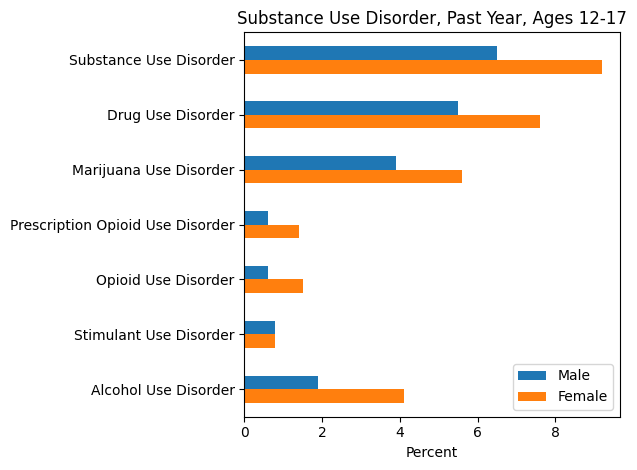

In [27]:
plot_percentages(tables_past_year['Aged 12-17'], title='Substance Use Disorder, Past Year, Ages 12-17')
plt.savefig('use_disorder_year_teen.png')

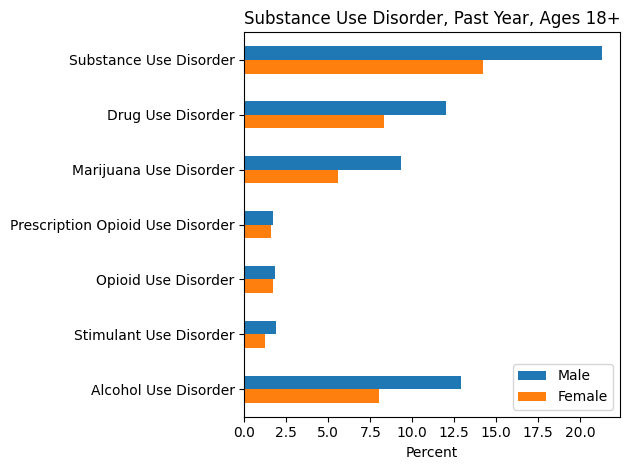

In [28]:
plot_percentages(tables_past_year['Aged 18+'], title='Substance Use Disorder, Past Year, Ages 18+')
plt.savefig('use_disorder_year_adult.png');

### Received treatment

In [29]:
tables = [15]
tables_past_month = compile_tables(tables, prefix=5)

5.15B Past Year Received Substance Use Treatment


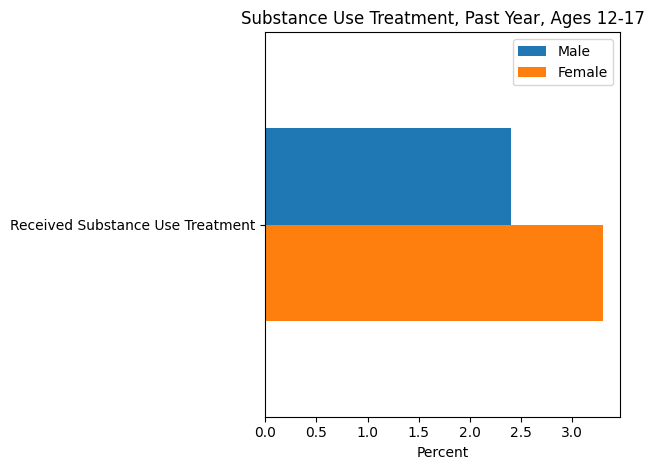

In [30]:
plot_percentages(tables_past_month['Aged 12-17'], title='Substance Use Treatment, Past Year, Ages 12-17')
plt.savefig('treatment_past_year_teen.png')

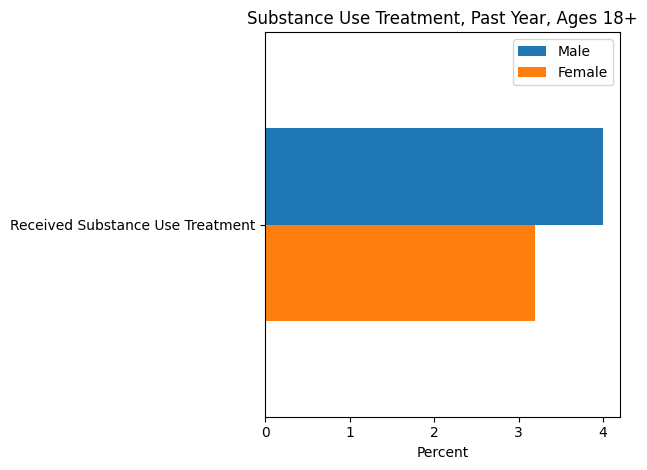

In [31]:
plot_percentages(tables_past_month['Aged 18+'], title='Substance Use Treatment, Past Year, Ages 18+')
plt.savefig('treatment_past_year_adult.png');

## Plot Changes

In [32]:
tables_past_year

Aged 12-17       \
                                                                  2023 2024   
                                 Demographic Characteristic                   
Substance Use Disorder           Male                              6.4  6.5   
                                 Female                           10.6  9.2   
Drug Use Disorder                Male                              5.1  5.5   
                                 Female                            8.7  7.6   
Marijuana Use Disorder           Male                              3.6  3.9   
                                 Female                            5.9  5.6   
Prescription Opioid Use Disorder Male                              0.6  0.6   
                                 Female                            1.2  1.4   
Opioid Use Disorder              Male                              0.6  0.6   
                                 Female                            1.2  1.5   
Stimulant Use Disorder           Male                              0.9  0.8   
                                 Female                            1.1  0.8   
Alcohol Use Disorder             Male                              2.0  1.9   
                                 Female                            3.8  4.1   

                                                                         \
                                                            Change Diff   
                                 Demographic Characteristic               
Substance Use Disorder           Male                          0.1  NaN   
                                 Female                       -1.4  2.7   
Drug Use Disorder                Male                          0.4  NaN   
                                 Female                       -1.1  2.1   
Marijuana Use Disorder           Male                          0.3  NaN   
                                 Female                       -0.3  1.7   
Prescription Opioid Use Disorder Male                          0.0  NaN   
                                 Female                        0.2  0.8   
Opioid Use Disorder              Male                          0.0  NaN   
                                 Female                        0.3  0.9   
Stimulant Use Disorder           Male                         -0.1  NaN   
                                 Female                       -0.3  0.0   
Alcohol Use Disorder             Male                         -0.1  NaN   
                                 Female                        0.3  2.2   

                                                            Aged 18+        \
                                                                2023  2024   
                                 Demographic Characteristic                  
Substance Use Disorder           Male                           21.4  21.3   
                                 Female                         14.7  14.2   
Drug Use Disorder                Male                           11.7  12.0   
                                 Female                          8.1   8.3   
Marijuana Use Disorder           Male                            8.7   9.3   
                                 Female                          5.3   5.6   
Prescription Opioid Use Disorder Male                            1.7   1.7   
                                 Female                          1.7   1.6   
Opioid Use Disorder              Male                            1.9   1.8   
                                 Female                          1.9   1.7   
Stimulant Use Disorder           Male                            1.9   1.9   
                                 Female                          1.3   1.2   
Alcohol Use Disorder             Male                           13.2  12.9   
                                 Female                          8.7   8.0   

                                                                         
                                       

In [33]:
from tables import plot_changes

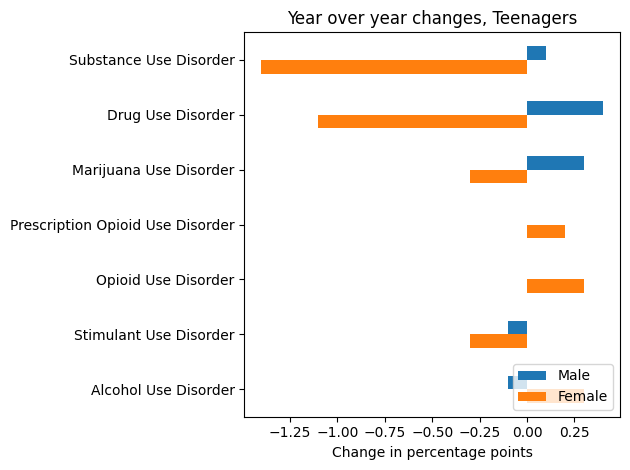

In [34]:
plot_changes(tables_past_year['Aged 12-17'], 
             title='Year over year changes, Teenagers')
plt.savefig('use_disorder_changes_teenager.png');

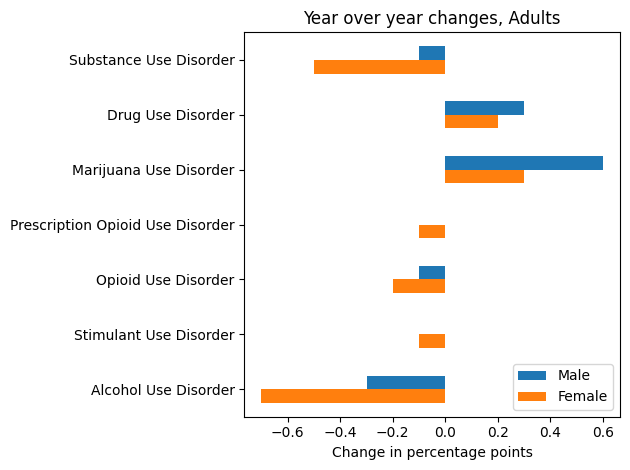

In [35]:
plot_changes(tables_past_year['Aged 18+'], title='Year over year changes, Adults')
plt.savefig('use_disorder_changes_adult.png');